In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text


# 1. 의사결정나무 (분류 분석)

In [2]:
# 타이타닉 train 데이터 불러오기
train = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/preprocessing_titanic_train.csv',index_col= 'Unnamed: 0')

X = train.drop('Survived', axis=1)
y = train['Survived']

# feature, target 분리 (훈련, 테스트셋도 분리)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

## 1-1. 분류 분석 시행

In [3]:
# 의사결정나무 모델 형성 및 y 분류 시행
model = DecisionTreeClassifier(criterion="entropy", 
                                    splitter="best",
                                    max_depth=2,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features=None,
                                    random_state=None,
                                    max_leaf_nodes=4,
                                    min_impurity_decrease=0.0,
                                    class_weight=None,
                                    ccp_alpha=0.0)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

## 1-2. 분류 분석 결과 (시각화, text, 정확도, 혼동행렬)

[Text(0.5, 0.8333333333333334, 'Sex <= 0.5\nentropy = 0.96\nsamples = 666\nvalue = [411, 255]\nclass = S'),
 Text(0.25, 0.5, 'Fare <= 14.479\nentropy = 0.727\nsamples = 434\nvalue = [346, 88]\nclass = S'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.516\nsamples = 269\nvalue = [238, 31]\nclass = S'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.93\nsamples = 165\nvalue = [108, 57]\nclass = S'),
 Text(0.75, 0.5, 'Pclass <= 2.5\nentropy = 0.856\nsamples = 232\nvalue = [65, 167]\nclass = u'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.347\nsamples = 123\nvalue = [8, 115]\nclass = u'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.998\nsamples = 109\nvalue = [57, 52]\nclass = S')]

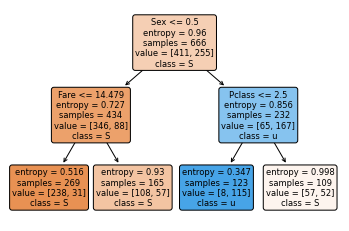

In [4]:
plot_tree(model,
          feature_names=X_train.columns, 
          class_names='Survived',
          filled = True,
          rounded=True)

In [5]:
print(export_text(model, 
                  feature_names=X_train.columns.to_list()))

|--- Sex <= 0.50
|   |--- Fare <= 14.48
|   |   |--- class: 0
|   |--- Fare >  14.48
|   |   |--- class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- class: 0



In [6]:
accuracy_score(y_test, y_predict)

0.8116591928251121

In [7]:
confusion_matrix(y_true=y_test, y_pred=y_predict)

array([[137,   1],
       [ 41,  44]])

## 1-3. 하이퍼파라미터 Grid-Search

In [8]:
# 분석 모형 설정
model = DecisionTreeClassifier()
# 하이퍼 파라미터 dict 형태로 설정
params = {'max_depth': [1,2,3], 'min_samples_split':[2,3]}

# param_grid = {'criterion':['gini','entropy'],
#               'max_depth':[None,2,3,4,5,6], 
#               'max_leaf_nodes':[None,2,3,4,5,6,7], 
#               'min_samples_split':[2,3,4,5,6], 
#               'min_samples_leaf':[1,2,3], 
#               'max_features':[None,'sqrt','log2',3,4,5]}

# 그리드서치 시행
grid_clf = GridSearchCV(estimator = model, 
                        param_grid=params,
                        scoring='accuracy',  
                        cv=3, 
                        refit=True, 
                        n_jobs=-1)
grid_clf.fit(X_train,y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

# 그리드 서치 결과 전부 데이터 프레임 화 시행
pd.DataFrame(grid_clf.cv_results_)

최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_split': 2}, 최적 평균 정확도 :0.772


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012005,0.005712,0.007549,0.006283,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.765766,0.761261,0.783784,0.770270,0.009731,3
1,0.012485,0.004854,0.084502,0.090344,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.765766,0.761261,0.783784,0.770270,0.009731,3
2,0.054552,0.058929,0.068697,0.054820,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.765766,0.779279,0.743243,0.762763,0.014864,5
3,0.008909,0.001217,0.005070,0.000737,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.765766,0.779279,0.743243,0.762763,0.014864,5
4,0.007935,0.001441,0.002947,0.000089,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.774775,0.765766,0.774775,0.771772,0.004247,1
5,0.007447,0.001761,0.004704,0.000891,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.774775,0.765766,0.774775,0.771772,0.004247,1


# 2. 의사결정나무 (회귀분석)

## 2-1. 회귀 분석 시행

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=2022)

model = DecisionTreeRegressor(criterion="squared_error",
                              splitter="best",
                              max_depth=2,
                              min_samples_split=30,
                              min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0,
                              max_features=None,
                              random_state=2022,
                              max_leaf_nodes=4,
                              min_impurity_decrease=0.0,
                              ccp_alpha=0.0)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

## 2-2. 회귀 분석 결과 (시각화, text, 결정계수)

[Text(0.5, 0.8333333333333334, 'MedInc <= 5.045\nsquared_error = 1.341\nsamples = 16512\nvalue = 2.077'),
 Text(0.25, 0.5, 'MedInc <= 3.074\nsquared_error = 0.837\nsamples = 12999\nvalue = 1.738'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.555\nsamples = 6253\nvalue = 1.359'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.841\nsamples = 6746\nvalue = 2.09'),
 Text(0.75, 0.5, 'MedInc <= 6.82\nsquared_error = 1.209\nsamples = 3513\nvalue = 3.33'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.892\nsamples = 2435\nvalue = 2.933'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.768\nsamples = 1078\nvalue = 4.226')]

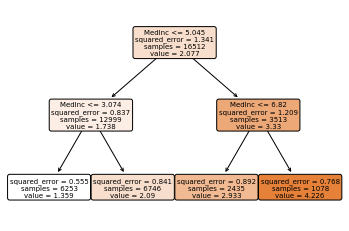

In [10]:
plot_tree(model,
          feature_names = data['feature_names'],
          class_names = 'target',
          filled = True,
          rounded = True)

In [11]:
print(export_text(model, 
                  feature_names=X_train.columns.to_list()))

|--- MedInc <= 5.05
|   |--- MedInc <= 3.07
|   |   |--- value: [1.36]
|   |--- MedInc >  3.07
|   |   |--- value: [2.09]
|--- MedInc >  5.05
|   |--- MedInc <= 6.82
|   |   |--- value: [2.93]
|   |--- MedInc >  6.82
|   |   |--- value: [4.23]



In [12]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.4511628747501255
0.4295379977717926


## 1-3 하이퍼파라미터 Grid-Search

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 분석 모형 설정
model = DecisionTreeRegressor()
# 하이퍼 파라미터 dict 형태로 설정
params = {'criterion':['squared_error'], 'max_depth':[None,2,3,4,5,6]}

# param_grid = {'criterion':['squared_error','friedman_mse','absolute_error'], 
#               'max_depth':[None,2,3,4,5,6], 
#               'max_leaf_nodes':[None,2,3,4,5,6,7],
#               'min_samples_split':[2,3,4,5,6],
#               'min_samples_leaf':[1,2,3], 
#               'max_features':[None,'sqrt','log2',3,4,5]}

# 그리드서치 시행
grid_clf = GridSearchCV(estimator = model, 
                        param_grid=params, 
                        cv=3, 
                        refit=True, 
                        n_jobs=-1)
grid_clf.fit(X_train,y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

# 그리드 서치 결과 전부 데이터 프레임 화 시행
pd.DataFrame(grid_clf.cv_results_)

최적 하이퍼 파라미터 :{'criterion': 'squared_error', 'max_depth': 6}, 최적 평균 정확도 :0.648


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.429757,0.054456,0.035089,0.031753,squared_error,None,"{'criterion': 'squared_error', 'max_depth': None}",0.565195,0.612450,0.589241,0.588962,0.019293,3
1,0.083841,0.059445,0.023709,0.025303,squared_error,2,"{'criterion': 'squared_error', 'max_depth': 2}",0.446661,0.454386,0.439719,0.446922,0.005991,6
2,0.180668,0.055960,0.024339,0.015924,squared_error,3,"{'criterion': 'squared_error', 'max_depth': 3}",0.523313,0.536313,0.524817,0.528148,0.005806,5
3,0.224522,0.024748,0.016277,0.004374,squared_error,4,"{'criterion': 'squared_error', 'max_depth': 4}",0.575317,0.584551,0.569732,0.576533,0.006111,4
4,0.265310,0.053336,0.020228,0.021352,squared_error,5,"{'criterion': 'squared_error', 'max_depth': 5}",0.614735,0.622789,0.603188,0.613571,0.008044,2
5,0.288016,0.019975,0.007930,0.002334,squared_error,6,"{'criterion': 'squared_error', 'max_depth': 6}",0.654426,0.653513,0.636880,0.648273,0.008064,1


# 랜덤포레스트 (분류 분석)

## 3-1 분류 분석 시행

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

data = load_iris()
x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=2022)

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
model = RandomForestClassifier(n_estimators=6)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6)

## 3-2 분류 분석 결과 및 시각화

In [129]:
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9667


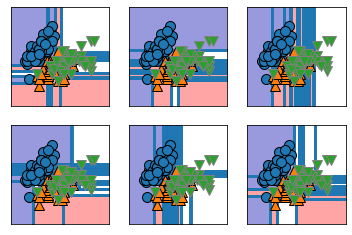

In [130]:
# 개별 트리에 대한 시각화 코드 예시
import mglearn
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# 데이터 설정
data = load_iris()
# X는 feature 4개중 0,1번째 항목 선택
x = data.data[:,[0,1]] 
y = data.target

# 모델 형성
model = RandomForestClassifier(n_estimators=6)
model.fit(x, y)

# 각 tree 별 시각화
for i in range(6):
    plt.subplot(2,3,i+1)
    mglearn.plots.plot_tree_partition(x, y, model.estimators_[i])

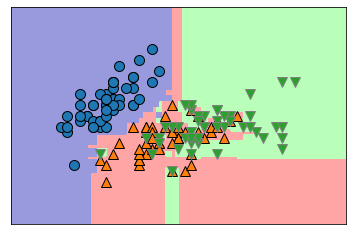

In [131]:
# 랜덤포레스트 자체의 결과 시각화
mglearn.plots.plot_2d_classification(model,X, fill=True, alpha=.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

## 3-3. 하이퍼파라미터 Grid-Search

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [3,5],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [20]})

In [86]:
# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))

# 그리드 서치 결과 전부 데이터 프레임 화 시행
pd.DataFrame(grid.cv_results_).head()

최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 7, 'n_estimators': 20}, 최적 평균 정확도 :0.967


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074863,0.019589,0.017143,0.018052,entropy,3,auto,4,5,20,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",1.0,0.966667,0.866667,1.0,0.958333,0.054645,14
1,0.086788,0.018355,0.010082,0.003823,entropy,3,auto,4,7,20,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",1.0,0.966667,0.866667,1.0,0.958333,0.054645,14
2,0.074751,0.011786,0.010623,0.007879,entropy,3,auto,4,10,20,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",1.0,0.966667,0.800000,1.0,0.941667,0.082916,72
3,0.081592,0.013184,0.012701,0.005495,entropy,3,auto,6,5,20,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",1.0,0.966667,0.866667,1.0,0.958333,0.054645,14
4,0.084248,0.006752,0.014158,0.007280,entropy,3,auto,6,7,20,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",1.0,0.966667,0.900000,1.0,0.966667,0.040825,1
